In [1]:
import sys
sys.path.insert(0,"/mnt/c/SlowQuant/")
import numpy as np
import time
import matplotlib.pyplot as plt
from slowquant import shortcuts as SQ

In [2]:
basis = ['cc-pVDZ', 'aug-cc-pVDZ', 'cc-pVTZ']
molecules = [np.array([[10,0,0,0],
                [1,1.63803684,1.136548823,0.0],
                [8,0.0,-0.143225817,0.0],
                [1,-1.63803684,1.136548823,0.0]]),
             np.array([[10,0,0,0],
                [6,0.0,0.0,0.0],
                [1,1.183771682,-1.183771682,-1.183771682],
                [1,1.183771682,1.183771682,1.183771682],
                [1,-1.183771682,1.183771682,-1.183771682],
                [1,-1.183771682,-1.183771682,1.183771682]]),
             np.array([[4,0,0,0],
                [3,0.0,0.0,0.0],
                [1,1.4,0.0,0.0]]),
            np.array([[14,0,0,0],
                [6,0.0,0.0,0.0],
                [8,1.12,0.0,0.0]])]
pathtobasis = '/mnt/c/SlowQuant/slowquant/basissets/'

In [3]:
# basisset size, integral-time, hartreefock-time, total-time
timing = np.zeros((12,4))

In [4]:
idx = 0
for i in range(len(basis)):
    settings = {'basisset':basis[i]}
    for j in range(len(molecules)):
        timetot = time.time()
        # SQ.basisset is only used to get basisset size. Basisset is also constructed in SQ.Integrals
        timing[idx,0] = len(SQ.basisset(molecules[j], settings, pathtobasis))
        timeintegral = time.time()
        VNN, VNe, S, Te, Vee = SQ.Integrals(molecules[j], settings, pathtobasis)
        timeintegral = time.time() - timeintegral
        timehartreefock = time.time()
        EHF, C, F, D, iterations = SQ.HartreeFock(molecules[j], VNN, Te, S, VNe, Vee)
        timehartreefock = time.time() - timehartreefock
        timetot = time.time() - timetot
        timing[idx,1] = timeintegral
        timing[idx,2] = timehartreefock
        timing[idx,3] = timetot
        idx += 1

In [5]:
timing = np.sort(timing, axis=0)

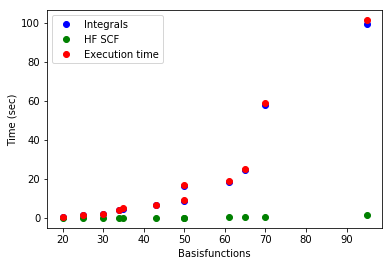

In [6]:
plt.plot(timing[:,0], timing[:,1], 'bo', label='Integrals')
plt.plot(timing[:,0], timing[:,2], 'go', label='HF SCF')
plt.plot(timing[:,0], timing[:,3], 'ro', label='Execution time')
plt.legend(loc=2)
plt.ylabel('Time (sec)')
plt.xlabel('Basisfunctions')
plt.show()